In [0]:
from fastai import *

In [0]:
from fastai.vision import *

In [0]:
path = Path('drive/My Drive/Colab Notebooks/Fruits')

In [0]:
folder = 'trauben'
file = 'trauben.csv'

In [0]:
folder2 = 'banana'
file2 = 'banana.csv'

In [0]:
folder3 = 'apple'
file3 = 'apple.csv'

In [0]:
destApple = path/folder3
destApple.mkdir(parents=True, exist_ok=True)

destBanana = path/folder2
destBanana.mkdir(parents=True, exist_ok=True)

destTraube = path/folder
destTraube.mkdir(parents=True, exist_ok=True)

In [0]:
path.ls()

[PosixPath('drive/My Drive/Colab Notebooks/Fruits/apple'),
 PosixPath('drive/My Drive/Colab Notebooks/Fruits/banana'),
 PosixPath('drive/My Drive/Colab Notebooks/Fruits/trauben'),
 PosixPath('drive/My Drive/Colab Notebooks/Fruits/trauben.csv'),
 PosixPath('drive/My Drive/Colab Notebooks/Fruits/banana.csv'),
 PosixPath('drive/My Drive/Colab Notebooks/Fruits/apple.csv'),
 PosixPath('drive/My Drive/Colab Notebooks/Fruits/models'),
 PosixPath('drive/My Drive/Colab Notebooks/Fruits/cleaned.csv')]

In [0]:
classes = ['apple','banana','trauben']

In [0]:
#download_images(path/file, destTraube, max_pics=40, max_workers=0)

In [0]:
#download_images(path/file2, destBanana, max_pics=40, max_workers=0)

In [0]:
#download_images(path/file3, destApple, max_pics=40, max_workers=0)

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

apple


banana


trauben


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=40, num_workers=4).normalize(imagenet_stats)

In [0]:
data.classes

['apple', 'banana', 'trauben']

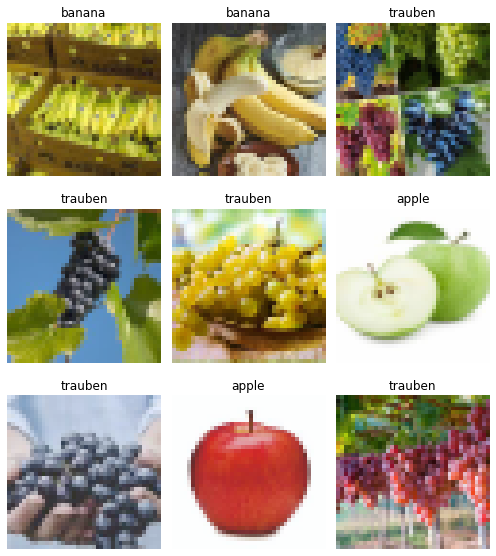

In [0]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['apple', 'banana', 'trauben'], 3, 96, 24)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.689196,2.603175,0.708333,00:02
1,1.933241,1.170844,0.375000,00:02
2,1.680022,0.761839,0.250000,00:02
3,1.507231,0.734978,0.250000,00:02


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


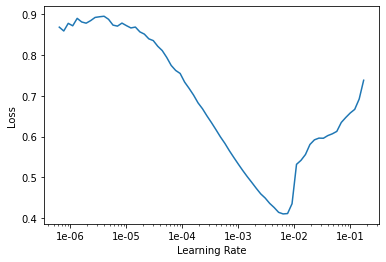

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.060590,0.728773,0.250000,00:03
1,0.940302,0.816321,0.208333,00:03


In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-2');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

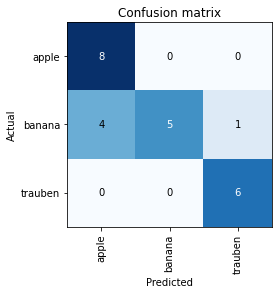

In [0]:
interp.plot_confusion_matrix()

In [0]:
#from fastai.widgets import *

In [0]:
#db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

SyntaxError: ignored

In [0]:
#learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

#learn_cln.load('stage-2');

In [0]:
#ds, idxs = DatasetFormatter().from_toplosses(learn_cln)